## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn import metrics

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [2]:
#Reading in the data
data_df = pd.read_csv('401ksubs.csv')

In [3]:
#Checking how the data looks
data_df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

Tax  Bracket, Dependants, Household

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

This may lead to racial bias as IRA's and 401k's will be advertised only to specific to race. This is racial discrimination.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

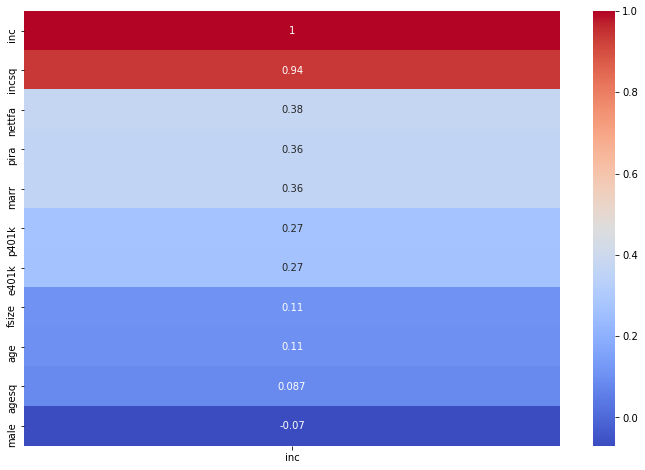

In [4]:
#Finding correlations of predictors to income
focus = data_df.corr()[['inc']].sort_values(by = 'inc', ascending = False)
plt.figure(figsize = (12,8))
sns.heatmap(focus, annot = True, cmap = 'coolwarm')

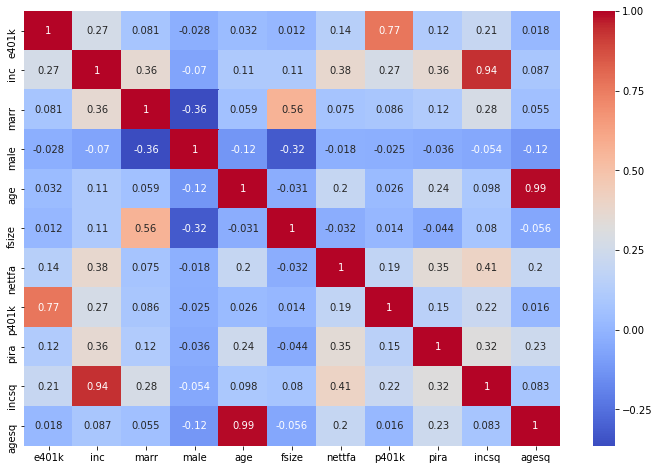

In [5]:
#Checking correlation of variables among themselves
plt.figure(figsize = (12,8))
sns.heatmap(data_df.corr(), annot = True, cmap = 'coolwarm')

I would remove income-squared

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

income-squared, age-squares. It might be some calculations within the returns, interest rate, etc

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

The description age^2 for age. Age of the person would be a better description.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [6]:
#Listing out the columns of the dataset
data_df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [7]:
#Seperating X and Y for the model
features = ['e401k', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira', 'agesq']
X = data_df[features]
y = data_df['inc']

In [8]:
#Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [9]:
#Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
print (f'The training accuracy score is {lr.score(X_train, y_train)}')
print (f'The testing accuracy score is {lr.score(X_test, y_test)}')
lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_rmse_test = np.sqrt(mean_squared_error(y_test, lr_pred_test))
lr_rmse_train = np.sqrt(mean_squared_error(y_train, lr_pred_train))
print (f'The testing rmse score is {lr_rmse_test}')
print (f'The training rmse score is {lr_rmse_train}')

The training accuracy score is 0.3637103479233086
The testing accuracy score is 0.33805976697397133
The testing rmse score is 19.866164590207703
The training rmse score is 19.126719073874185


In [10]:
#Knn model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print (f'The training accuracy score is {knn.score(X_train, y_train)}')
print (f'The testing accuracy score is {knn.score(X_test, y_test)}')
knn_pred_test = knn.predict(X_test)
knn_pred_train = knn.predict(X_train)
knn_rmse_test = np.sqrt(mean_squared_error(y_test, knn_pred_test))
knn_rmse_train = np.sqrt(mean_squared_error(y_train, knn_pred_train))
print (f'The testing rmse score is {knn_rmse_test}')
print (f'The training rmse score is {knn_rmse_train}')

The training accuracy score is 0.49439930205513694
The testing accuracy score is 0.2338975507336104
The testing rmse score is 21.37214270687069
The training rmse score is 17.049705481876153


In [11]:
#Decision Tree model
dt = DecisionTreeRegressor(min_samples_leaf= 50)
dt.fit(X_train, y_train)
print (f'The training accuracy score is {dt.score(X_train, y_train)}')
print (f'The testing accuracy score is {dt.score(X_test, y_test)}')
dt_pred_test = dt.predict(X_test)
dt_pred_train = dt.predict(X_train)
dt_rmse_test = np.sqrt(mean_squared_error(y_test, dt_pred_test))
dt_rmse_train = np.sqrt(mean_squared_error(y_train, dt_pred_train))
print (f'The testing rmse score is {dt_rmse_test}')
print (f'The training rmse score is {dt_rmse_train}')

The training accuracy score is 0.4420121172985837
The testing accuracy score is 0.3889697378279839
The testing rmse score is 19.08692644750079
The training rmse score is 17.91123091359276


In [12]:
#bagged Decision Trees
bg = BaggingRegressor(n_estimators= 100, bootstrap_features= True, oob_score = True, n_jobs= -1 )
bg.fit(X_train, y_train)
print (f'The training accuracy score is {bg.score(X_train, y_train)}')
print (f'The testing accuracy score is {bg.score(X_test, y_test)}')

bg_pred_test = dt.predict(X_test)
bg_pred_train = dt.predict(X_train)
bg_rmse_test = np.sqrt(mean_squared_error(y_test, bg_pred_test))
bg_rmse_train = np.sqrt(mean_squared_error(y_train, bg_pred_train))
print (f'The testing rmse score is {bg_rmse_test}')
print (f'The training rmse score is {bg_rmse_train}')

The training accuracy score is 0.8191341777564317
The testing accuracy score is 0.35846746218423986
The testing rmse score is 19.08692644750079
The training rmse score is 17.91123091359276


In [13]:
#random forest
rf = RandomForestRegressor(n_estimators= 100, oob_score = True, n_jobs= -1)
rf.fit(X_train, y_train)
print (f'The training accuracy score is {rf.score(X_train, y_train)}')
print (f'The testing accuracy score is {rf.score(X_test, y_test)}')

rf_pred_test = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_pred_train))
print (f'The testing rmse score is {rf_rmse_test}')
print (f'The training rmse score is {rf_rmse_train}')

The training accuracy score is 0.9039665144477348
The testing accuracy score is 0.3441931280856283
The testing rmse score is 19.773913115352208
The training rmse score is 7.430608754972918


In [14]:
#Adaboost
ad = AdaBoostRegressor(learning_rate= 0.01)
ad.fit(X_train, y_train)
print (f'The training accuracy score is {ad.score(X_train, y_train)}')
print (f'The testing accuracy score is {ad.score(X_test, y_test)}')

ad_pred_test = ad.predict(X_test)
ad_pred_train = ad.predict(X_train)
ad_rmse_test = np.sqrt(mean_squared_error(y_test, ad_pred_test))
ad_rmse_train = np.sqrt(mean_squared_error(y_train, ad_pred_train))
print (f'The testing rmse score is {ad_rmse_test}')
print (f'The training rmse score is {ad_rmse_train}')

The training accuracy score is 0.38005158607802403
The testing accuracy score is 0.3477700790920627
The testing rmse score is 19.719913202402005
The training rmse score is 18.879514659123565


In [15]:
#SVM
sv = SVR(C = 0.01)
sv.fit(X_train, y_train)
print (f'The training accuracy score is {sv.score(X_train, y_train)}')
print (f'The testing accuracy score is {sv.score(X_test, y_test)}')

sv_pred_test = sv.predict(X_test)
sv_pred_train = sv.predict(X_train)
sv_rmse_test = np.sqrt(mean_squared_error(y_test, sv_pred_test))
sv_rmse_train = np.sqrt(mean_squared_error(y_train, sv_pred_train))
print (f'The testing rmse score is {sv_rmse_test}')
print (f'The training rmse score is {sv_rmse_train}')

/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The training accuracy score is -0.054408263884791586
The testing accuracy score is -0.05192840926608699
The testing rmse score is 25.04365613974942
The training rmse score is 24.621666781768717


In [16]:
#Which are the parameters that are interesting
ad_coeff = ad.feature_importances_
features = ['e401k', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k', 'pira', 'agesq']

dict_coeff= {'features' : features,
            'coefficients': ad_coeff}
df = pd.DataFrame(dict_coeff)
df.sort_values(by = 'coefficients', ascending = False)

,features,coefficients
5,nettfa,0.749570
1,marr,0.245620
3,age,0.001520
8,agesq,0.001505
0,e401k,0.000827
7,pira,0.000578
2,male,0.000201
6,p401k,0.000178
4,fsize,0.000000


##### 9. What is bootstrapping?

Taking a random sample 'n' from a dataset with replacement is called bootstrapping

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

bagged decision trees generally predict more accurate outputs than one decision trees as the aggregated outputs mitigates overfitting

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

The only difference is that the random forest selects random subset of features at each split

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Bagged Decision Trees are esentially trained on the same features. This leads to high variance in the model. However Random forests are trained on separate features and hence have less variance between results

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [17]:
#Creating a dataframe of RMSE's for better visualisation
testing_rmse = [lr_rmse_test, knn_rmse_test, dt_rmse_test, rf_rmse_test, bg_rmse_test, ad_rmse_test, sv_rmse_test]
training_rmse = [lr_rmse_train, knn_rmse_train, dt_rmse_train, rf_rmse_train, bg_rmse_train, ad_rmse_train, sv_rmse_train]
models = ['Linear Regression', 
          'K-nearest-neighbors',
          'Decision Tree',
          'Random Forest',
          'Bag of Trees',
          'Adaboost',
          'SVM'
         ]

dict_rmse = {'Training RMSE': training_rmse,
             'Testing RMSE' : testing_rmse}
pd.DataFrame(dict_rmse, index = models)

,Training RMSE,Testing RMSE
Linear Regression,19.126719,19.866165
K-nearest-neighbors,17.049705,21.372143
Decision Tree,17.911231,19.086926
Random Forest,7.430609,19.773913
Bag of Trees,17.911231,19.086926
Adaboost,18.879515,19.719913
SVM,24.621667,25.043656


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

There is overfitting in many models. But clear overfitting can be seen in case of the Ramndom Forest model.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I would choose the Bag of trees model with relavant parameters. Because it has low overfitting in this case and is a better model than decision trees

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Grid search for parameter tuning.
2. Increase number of trees

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

p401k indicates whether a person did or did not participate in the 401k program. These two variables are highly corellated with a corelation coefficient of 0.77. So it is best to drop 1.

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

1. a logistic regression model
2. a k-nearest neighbors model
3. a decision tree
4. a set of bagged decision trees
5. a random forest
6. an Adaboost model
7. a support vector classifier

All these problems are suited for binary classification.

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [18]:
#Seperating X and Y for the model
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'inc', 'pira', 'agesq']
X = data_df[features]
y = data_df['e401k']

In [19]:
#Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [20]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print (f'The training accuracy score is {lr.score(X_train, y_train)}')
print (f'The testing accuracy score is {lr.score(X_test, y_test)}')
pred_lr_test = lr.predict(X_test)
pred_lr_train = lr.predict(X_train)
f1_lr_test = metrics.f1_score(y_test, pred_lr_test)
f1_lr_train = metrics.f1_score(y_train, pred_lr_train)

The training accuracy score is 0.6457734330074756
The testing accuracy score is 0.6614920224234584


/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
#KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print (f'The training accuracy score is {knn.score(X_train, y_train)}')
print (f'The testing accuracy score is {knn.score(X_test, y_test)}')
pred_knn_test = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
f1_knn_test = metrics.f1_score(y_test, pred_knn_test)
f1_knn_train = metrics.f1_score(y_train, pred_knn_train)

The training accuracy score is 0.7502875215641173
The testing accuracy score is 0.6326002587322122


In [22]:
#Decision Tree model
dt = DecisionTreeClassifier(min_samples_leaf= 100)
dt.fit(X_train, y_train)
print (f'The training accuracy score is {dt.score(X_train, y_train)}')
print (f'The testing accuracy score is {dt.score(X_test, y_test)}')
pred_dt_test = dt.predict(X_test)
pred_dt_train = dt.predict(X_train)
f1_dt_test = metrics.f1_score(y_test, pred_dt_test)
f1_dt_train = metrics.f1_score(y_train, pred_dt_train)

The training accuracy score is 0.6943645773433007
The testing accuracy score is 0.692539887882708


In [23]:
#bagged Decision Trees
bg = BaggingClassifier(n_estimators= 100, max_samples = 100)
bg.fit(X_train, y_train)
print (f'The training accuracy score is {bg.score(X_train, y_train)}')
print (f'The testing accuracy score is {bg.score(X_test, y_test)}')
pred_bg_test = bg.predict(X_test)
pred_bg_train = bg.predict(X_train)
f1_bg_test = metrics.f1_score(y_test, pred_bg_test)
f1_bg_train = metrics.f1_score(y_train, pred_bg_train)

The training accuracy score is 0.6910580793559516
The testing accuracy score is 0.6821905993962915


In [24]:
#random forest
rf = RandomForestClassifier(n_estimators =100, min_samples_leaf = 35)
rf.fit(X_train, y_train)
print (f'The training accuracy score is {rf.score(X_train, y_train)}')
print (f'The testing accuracy score is {rf.score(X_test, y_test)}')
pred_rf_test = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
f1_rf_test = metrics.f1_score(y_test, pred_rf_test)
f1_rf_train = metrics.f1_score(y_train, pred_rf_train)

The training accuracy score is 0.7096032202415181
The testing accuracy score is 0.691246226821906


In [25]:
#Adaboost
ad = AdaBoostClassifier(learning_rate= 0.1)
ad.fit(X_train, y_train)
print (f'The training accuracy score is {ad.score(X_train, y_train)}')
print (f'The testing accuracy score is {ad.score(X_test, y_test)}')
pred_ad_test = ad.predict(X_test)
pred_ad_train = ad.predict(X_train)
f1_ad_test = metrics.f1_score(y_test, pred_ad_test)
f1_ad_train = metrics.f1_score(y_train, pred_ad_train)

The training accuracy score is 0.6868890166762507
The testing accuracy score is 0.6869340232858991


In [26]:
#SVM
sv = SVC(C = 0.01)
sv.fit(X_train, y_train)
print (f'The training accuracy score is {sv.score(X_train, y_train)}')
print (f'The testing accuracy score is {sv.score(X_test, y_test)}')
pred_sv_test = sv.predict(X_test)
pred_sv_train = sv.predict(X_train)
f1_sv_test = metrics.f1_score(y_test, pred_sv_test)
f1_sv_train = metrics.f1_score(y_train, pred_sv_train)

/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The training accuracy score is 0.6060954571592869
The testing accuracy score is 0.6131953428201811


/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

1. The false positives are those that are predicted eligible for a 401(k) but in reality are not eligible.

2. The false negatives are those that are predicted ineligible for a 401(k) but in reality are eligible. 

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

I am working for a financial services company with the aim of garnering as many customers as possible. I would not mind false positives as they can be assesed later on. False negatives will however put really valuable customers off of my radar.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

We would optimize specificity.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

The best model in this case was the adaboost model. Let us look at the confusion matrix of adaboost.

In [28]:
#Checking the confusion Matrix
pd.DataFrame(confusion_matrix(y_test,pred_ad_test), 
             columns = ['Predicted False', 'Predicted True'],
             index = ['Actual False', 'Actual True'])

,Predicted False,Predicted True
Actual False,1137,285
Actual True,441,456


##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [30]:
#Creating a dataframe of f1-scores for better visualisation
testing_f1 = [f1_lr_test, f1_knn_test, f1_dt_test, f1_rf_test, f1_bg_test, f1_ad_test, f1_sv_test]
training_f1 = [f1_lr_train, f1_knn_train, f1_dt_train, f1_rf_train, f1_bg_train, f1_ad_train, f1_sv_train]
models = ['Logistic Regression', 
          'K-nearest-neighbors',
          'Decision Tree',
          'Random Forest',
          'Bag of Trees',
          'Adaboost',
          'SVC'
         ]

dict_f1 = {'Training f-1 score': training_f1,
             'Testing f-1 score' : testing_f1}
pd.DataFrame(dict_f1, index = models)

,Training f-1 score,Testing f-1 score
Logistic Regression,0.379032,0.400306
K-nearest-neighbors,0.659211,0.491647
Decision Tree,0.551666,0.547302
Random Forest,0.575452,0.541613
Bag of Trees,0.540124,0.522977
Adaboost,0.561418,0.556777
SVC,0.000000,0.000000


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

The Knn model shows clear signs of overfitting

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I would pick the bag of trees model, since they are tied at first spot in terms of f-1 score and because they can be easily interpretted.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Tweak Parameters
2. Increase trees
3. Run Gridsearch, check ROC

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

1. Net Financial assets, and marital status are the two best features that predict one's income
2. We can predict whether or not one is eligible for a 401k 69% of the time.